# 1. Dataset Information

#### Data File: 'Final_Data_ngoimpact.com.xlsx'
#### Source: https://github.com/DaanMatch/Codebook/blob/main/ds/ngo_impact_harish/Final_Data_ngoimpact.com.xlsx
#### Type: xlsx
#### Size: 381 KB

In [2]:
import boto3
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re

In [3]:
client = boto3.client('s3')
resource = boto3.resource('s3')
my_bucket = resource.Bucket('my-bucket')

In [4]:
ngoimpact = pd.read_excel('Final_Data_ngoimpact.com.xlsx')
ngoimpact

,Link,About,VISION,Your organisation is registered as,Permanent account number (PAN),Registration number / CIN & registration date,12A registration number & registration date,80G registration number & registration date,FCRA registration number & registration date,35AC registration number & registration date,...,Project description,Logo,Name,About Founder,Address,URL,Area of focus,Geographical Activity,Project Completed,Funding requirement
0,http://www.ngoimpact.com/ngos/turning-point-fo...,"TPF is a not for profit, national level volunt...",VisionThe vision of the organisation is to dev...,Charitable Society,AABTT1084A,S/41220 - 14-01-2002,1242 - 14-03-2003,8263043 - 11-10-2011,231660609 - 12-12-2005,NaN,...,Project description Drug De-addiction & Rehabi...,http://www.ngoimpact.com/ngoadmin/public/ngo_p...,Turning Point Foundation Best Non-Government O...,perm_identity Founded by Mr. Jojo Thomas ( 25 ...,"room A-528, Near Dayal Market, Narela Road, Al...",http://www.tpfindia.org,Healthcare / Prevention,Delhi,5.0,1500000.0
1,http://www.ngoimpact.com/ngos/basic-research-e...,Basic Research Education And Development Socie...,To inculcate the thirst for knowledge among st...,Charitable Society,AAATB4485E,1755 of 1989 - 11-08-1989,H.Qrs11/12A&80G/32/ - 19-10-1990,HYD/80G/155(3)/08-09 - 10-09-2008,010260111 - 05-08-2016,NaN,...,Project description BREAD Society seeks out sc...,http://www.ngoimpact.com/ngoadmin/public/ngo_p...,Basic Research Education And Development Socie...,perm_identity Founded by Mr. Ramamohan Rao Kak...,"room Plot # 1300 A, Jubilee Hills,, Road # 66,...",http://http://www.breadsocietyindia.org/,Education,Andhra Pradesh,18.0,3500000.0
2,http://www.ngoimpact.com/ngos/divya-jyothi-cha...,“ Divya Jyothi Charitable Trust” for the blind...,Empowering the visually impaired so that they ...,Public Charitable Trust,AABTD4733A,MYN-4-00326-2010-11 - 08-11-2010,D-54/12AA/MYS2011-12 - 27-06-2011,D-54/12AA/MYS2011-12 - 08-11-2010,094590221 - 22-12-2016,NaN,...,Project description “Divya Jyothi Charitable T...,http://www.ngoimpact.com/ngoadmin/public/ngo_p...,Divya Jyothi Charitable Trust Best Non-Governm...,perm_identity Founded by Shiv Prakash ( 07 yea...,"room No.151/f, Premises of Bapuji Children's H...",http://www.divyajyothitrust.org,Disability,Karnataka,18.0,1500000.0
3,http://www.ngoimpact.com/ngos/atma-foundation#...,ATMA Foundation is an NGO committed to empower...,"MissionEmpowering individuals, families & soci...",Public Charitable Trust,AADTA2673C,397/ IV / 06 - 08-05-2006,CIT-TCR/Tech/12A/18/ - 06-02-2012,AADTA 2673 C/09/15-1 - 28-05-2015,NaN,NaN,...,Project description The ATMA Harmony Centre cu...,http://www.ngoimpact.com/ngoadmin/public/ngo_p...,ATMA Foundation Best Non-Government Organizati...,perm_identity Founded by C.k Suresh ( 30 years...,"room ATMA Foundation, Surya Gardens,, Paliyam ...",http://www.atmafoundation.org,Promotion And Protection Of Child Rights,Kerala,0.0,0.0
4,http://www.ngoimpact.com/ngos/calcutta-rescue#...,Calcutta Rescue (CR) is a non – governmental o...,To reach out to more number of people living o...,Charitable Society,AAATC2014N,S/674950/ 1991- 92 - 04-04-1991,NaN,NaN,NaN,NaN,...,Project description Calcutta Rescue recognizes...,http://www.ngoimpact.com/ngoadmin/public/ngo_p...,Calcutta Rescue Best Non-Government Organizati...,perm_identity Founded by Jack Preger ( 35 year...,"room Calcutta Rescue 4th Floor, 85 Collin Stre...",http://www.calcuttarescue.org,Education,West Bengal,12.0,1500000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
546,http://www.ngoimpact.com/ngos/youth-union-for-...,YOUTH UNION FOR VARIOUS ACTION is located I Gu...,NaN,Public Charitable Trust,AAATY2186R,F/294/PORBANBAR - 10-10-2007,NaN,NaN,NaN,NaN,...,NaN,http://www.ngoimpact.com/resources/assets/imag...,YOUTH UNION FOR VARIOUS ACTION Best Non-Govern...,perm_identity Founded by Hasmukh ( 15 years of...,"room 1, nishant Bunglows, Near Bariz Avenew So...",NaN,Liveliho

# 2. Dataset Characteristics

In [5]:
print("Shape:",ngoimpact.shape)
print("Rows:",ngoimpact.shape[0])
print("Columns:",ngoimpact.shape[1])
print("Each row represents a NGO in India. Gives some information about each organization's vision, what they're registered as, project descriptions, etc.")

Shape: (551, 50)
Rows: 551
Columns: 50
Each row represents a NGO in India. Gives some information about each organization's vision, what they're registered as, project descriptions, etc.


In [6]:
len(ngoimpact)

551

In [7]:
# list of all the columns in the dataset
p = pd.DataFrame(ngoimpact.columns)
p

,0
0,Link
1,About
2,VISION
3,Your organisation is registered as
4,Permanent account number (PAN)
5,Registration number / CIN & registration date
6,12A registration number & registration date
7,80G registration number & registration date
8,FCRA registration number & registration date
9,35AC registration number & registration date


# 3. EDA

In [8]:
ngoimpact = ngoimpact.rename(columns = {"Your organisation is registered as": "Registered as"})

In [9]:
counts_impact = ngoimpact["Registered as"].value_counts(ascending = False)
counts_impact

Public Charitable Trust    356
Charitable Society         149
Section 8 Company            7
Name: Registered as, dtype: int64

In [10]:
geog = ngoimpact["Geographical Activity"].value_counts(ascending = False)
geog

Delhi                182
Maharashtra           79
West Bengal           42
Tamil Nadu            39
Odisha                32
Karnataka             24
Gujarat               21
Uttar Pradesh         17
Bihar                 16
Andhra Pradesh        11
Haryana                9
Madhya Pradesh         9
Himachal Pradesh       9
Rajasthan              9
Jharkhand              8
Telangana              8
Assam                  6
Kerala                 4
Uttarakhand            3
Arunachal Pradesh      2
Goa                    2
Manipur                1
Tripura                1
Chandigarh             1
Chhattisgarh           1
Pondicherry            1
Name: Geographical Activity, dtype: int64

In [11]:
area_funding = pd.DataFrame(ngoimpact.groupby("Area of focus").mean()["Funding requirement"])
area_funding 

,Funding requirement
Area of focus,
Advocacy,2.833333e+05
Community Development,7.359375e+05
Disability,1.333333e+06
Disaster Management,4.000000e+05
Education,1.662545e+06
Elderly Care,0.000000e+00
Environment,2.409375e+06
Gender Mainstreaming,5.000000e+04
Healthcare / Prevention,1.321429e+06


<AxesSubplot:xlabel='Funding requirement', ylabel='Area of focus'>

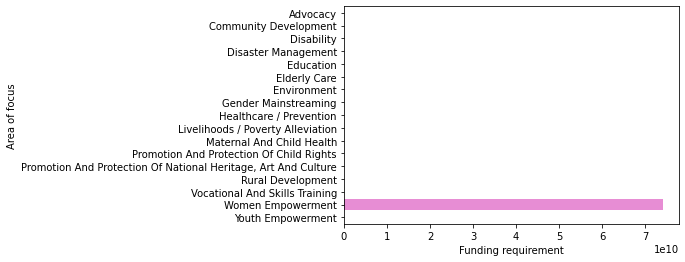

In [12]:
sns.barplot(data = area_funding, x = "Funding requirement", y = area_funding.index)

#### We see here that Women Empowerment is the area with the most amount of funding, on average, by far. To better visualize the funding distribution, we will drop Women Empowerment and create another bar chart.

<AxesSubplot:xlabel='Funding requirement', ylabel='Area of focus'>

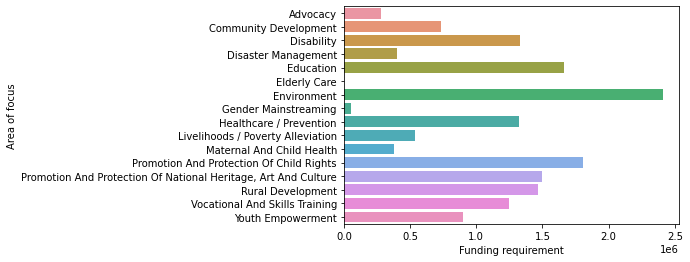

In [13]:
area_funding.drop("Women Empowerment", axis = 0, inplace = True)
sns.barplot(data = area_funding, x = "Funding requirement", y = area_funding.index)

### This could be the start of further analysis. We could investigate why Women Empowerment has higher funding requirements relative to other areas, and why an area such as elderly care or poverty alleviation takes so little.

### Another aspect to investigate is the relationship between geographical location and the average funding requirements, which we will do now.

In [14]:
geog_funding = pd.DataFrame(ngoimpact.groupby("Geographical Activity").mean()["Funding requirement"])
geog_funding.sort_values("Funding requirement", ascending = False)

,Funding requirement
Geographical Activity,
Assam,3.703704e+11
Maharashtra,2.972831e+06
Gujarat,2.965476e+06
Madhya Pradesh,2.896111e+06
Tripura,2.500000e+06
Pondicherry,1.200000e+06
Manipur,1.200000e+06
Uttar Pradesh,1.000000e+06
Bihar,9.437500e+05


### We can again clearly see one state, Assam, has the highest average funding requirement by far. Keeping that in mind, we will drop the row and plot the rest to get an understanding of the other datapoints.

In [15]:
geog_funding.drop("Assam", axis = 0, inplace = True)
geog_funding

,Funding requirement
Geographical Activity,
Andhra Pradesh,5.636364e+05
Arunachal Pradesh,0.000000e+00
Bihar,9.437500e+05
Chandigarh,0.000000e+00
Chhattisgarh,0.000000e+00
Delhi,5.898902e+05
Goa,0.000000e+00
Gujarat,2.965476e+06
Haryana,3.277778e+05


<AxesSubplot:xlabel='Funding requirement', ylabel='Geographical Activity'>

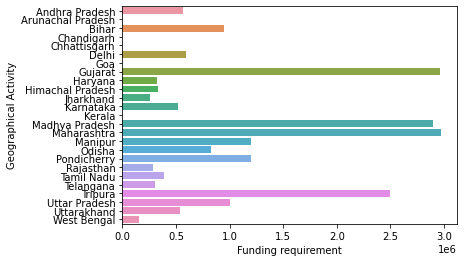

In [16]:
sns.barplot(data = geog_funding, x = "Funding requirement", y = geog_funding.index)